In [1]:
import pandas as pd
import numpy as np

import seaborn as sns

from sklearn import preprocessing, model_selection, metrics, ensemble

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

# 1. Carga de Datos (Train y Test)

In [3]:
train = pd.read_csv("datos/train_con_target.csv")
test =  pd.read_csv("datos/Test.csv")

In [4]:
# Inspeccionado los datos Train
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Target
0,489652,6578,10-Sep-05,4,0,0,0,2,1
1,507246,6578,18-Aug-05,45,5,0,0,7,0
2,524931,6535,07-Feb-04,0,0,0,0,0,0
3,494493,6570,20-May-05,0,0,0,0,0,0
4,523001,6562,22-May-05,0,0,0,0,0,0


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58532 entries, 0 to 58531
Data columns (total 9 columns):
Patient_ID           58532 non-null int64
Health_Camp_ID       58532 non-null int64
Registration_Date    58209 non-null object
Var1                 58532 non-null int64
Var2                 58532 non-null int64
Var3                 58532 non-null int64
Var4                 58532 non-null int64
Var5                 58532 non-null int64
Target               58532 non-null int64
dtypes: int64(8), object(1)
memory usage: 4.0+ MB


<b> Comentario:</b> Podemos ver que la única variable que tiene missings (323) es la var. Fecha (Registration_Date), pero son muy pocos.

In [6]:
# Hacemos lo mismo para el Test Set
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16746 entries, 0 to 16745
Data columns (total 8 columns):
Patient_ID           16746 non-null int64
Health_Camp_ID       16746 non-null int64
Registration_Date    16735 non-null object
Var1                 16746 non-null int64
Var2                 16746 non-null int64
Var3                 16746 non-null int64
Var4                 16746 non-null int64
Var5                 16746 non-null int64
dtypes: int64(7), object(1)
memory usage: 1.0+ MB


<b> Comentario:</b> Podemos ver que la única variable que tiene missings (11) es la var. Fecha (Registration_Date), pero son muy pocos.

## 1.1 Imputación de Missings en Train y Test

In [7]:
# Usamos la misma estrategia de Imputación para el Train y para el Test Set

In [8]:
train["Registration_Date"].fillna('10-jan-90',inplace=True)
test["Registration_Date"].fillna('10-jan-90',inplace=True)

In [9]:
# Comprobando que ya no hay missings

In [10]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58532 entries, 0 to 58531
Data columns (total 9 columns):
Patient_ID           58532 non-null int64
Health_Camp_ID       58532 non-null int64
Registration_Date    58532 non-null object
Var1                 58532 non-null int64
Var2                 58532 non-null int64
Var3                 58532 non-null int64
Var4                 58532 non-null int64
Var5                 58532 non-null int64
Target               58532 non-null int64
dtypes: int64(8), object(1)
memory usage: 4.0+ MB


In [11]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16746 entries, 0 to 16745
Data columns (total 8 columns):
Patient_ID           16746 non-null int64
Health_Camp_ID       16746 non-null int64
Registration_Date    16746 non-null object
Var1                 16746 non-null int64
Var2                 16746 non-null int64
Var3                 16746 non-null int64
Var4                 16746 non-null int64
Var5                 16746 non-null int64
dtypes: int64(7), object(1)
memory usage: 1.0+ MB


## 1.2 Convirtiendo a Formato Date (de Pandas) la variable "Registration_Date"

In [12]:
train['Registration_Date'] = pd.to_datetime(train['Registration_Date'], format="%d-%b-%y")
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Target
0,489652,6578,2005-09-10,4,0,0,0,2,1
1,507246,6578,2005-08-18,45,5,0,0,7,0
2,524931,6535,2004-02-07,0,0,0,0,0,0
3,494493,6570,2005-05-20,0,0,0,0,0,0
4,523001,6562,2005-05-22,0,0,0,0,0,0


In [13]:
# Comprobamos que ahora la variable "Registration_Date" ya no es de tipo 'object' sino que es de tipo 'datetime64'
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58532 entries, 0 to 58531
Data columns (total 9 columns):
Patient_ID           58532 non-null int64
Health_Camp_ID       58532 non-null int64
Registration_Date    58532 non-null datetime64[ns]
Var1                 58532 non-null int64
Var2                 58532 non-null int64
Var3                 58532 non-null int64
Var4                 58532 non-null int64
Var5                 58532 non-null int64
Target               58532 non-null int64
dtypes: datetime64[ns](1), int64(8)
memory usage: 4.0 MB


In [14]:
# Convertimos a formato fecha la variable "Registration_Date" en el Test Set

In [15]:
test['Registration_Date'] = pd.to_datetime(test['Registration_Date'],format="%d-%b-%y" )
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,523729,6534,2006-04-29,0,0,0,0,0
1,521364,6529,2006-02-28,15,1,0,0,7
2,506153,6534,2006-03-25,0,0,0,0,0
3,514205,6571,2005-09-15,0,0,0,0,0
4,496155,6541,2005-11-18,0,0,0,0,0


<b> Usamo el método toordinal()  </b> 

Para obtener una representación numéria de las Fechas, donde el número 1 = 01/Enero/Año 1

In [16]:
train['Registration_Date'] = train['Registration_Date'].apply(lambda x: x.toordinal())

In [17]:
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Target
0,489652,6578,732199,4,0,0,0,2,1
1,507246,6578,732176,45,5,0,0,7,0
2,524931,6535,731618,0,0,0,0,0,0
3,494493,6570,732086,0,0,0,0,0,0
4,523001,6562,732088,0,0,0,0,0,0


In [18]:
test['Registration_Date'] = test['Registration_Date'].apply(lambda x: x.toordinal())
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5
0,523729,6534,732430,0,0,0,0,0
1,521364,6529,732370,15,1,0,0,7
2,506153,6534,732395,0,0,0,0,0
3,514205,6571,732204,0,0,0,0,0
4,496155,6541,732268,0,0,0,0,0


In [19]:
print(train.shape,test.shape)

(58532, 9) (16746, 8)


## 1.3 Extraemos datos del df "Patient Details" y hacemos el merge con Train y Test

In [20]:
patient = pd.read_csv("datos/Patient_Profile.csv", na_values=['None',''])
patient.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1.0,90.0,39.0,18-Jun-03,NaN,Software Industry
1,507733,0,0,0,0,1.0,NaN,40.0,20-Jul-03,H,Software Industry
2,508307,0,0,0,0,3.0,87.0,46.0,02-Nov-02,D,BFSI
3,512612,0,0,0,0,1.0,75.0,47.0,02-Nov-02,D,Education
4,521075,0,0,0,0,3.0,NaN,80.0,24-Nov-02,H,Others


<b> Convirtiendo a formato Fecha la variable "First_Interaction" </b>

In [21]:
patient['First_Interaction'] = pd.to_datetime(patient['First_Interaction'], format="%d-%b-%y")
patient.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1.0,90.0,39.0,2003-06-18,NaN,Software Industry
1,507733,0,0,0,0,1.0,NaN,40.0,2003-07-20,H,Software Industry
2,508307,0,0,0,0,3.0,87.0,46.0,2002-11-02,D,BFSI
3,512612,0,0,0,0,1.0,75.0,47.0,2002-11-02,D,Education
4,521075,0,0,0,0,3.0,NaN,80.0,2002-11-24,H,Others


<b> Usamos el método toordinal() para obtener una representación numérica de las fechas   </b>

In [22]:
patient["First_Interaction"] = patient["First_Interaction"].apply(lambda x: x.toordinal())
patient.head()

,Patient_ID,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,516956,0,0,0,0,1.0,90.0,39.0,731384,NaN,Software Industry
1,507733,0,0,0,0,1.0,NaN,40.0,731416,H,Software Industry
2,508307,0,0,0,0,3.0,87.0,46.0,731156,D,BFSI
3,512612,0,0,0,0,1.0,75.0,47.0,731156,D,Education
4,521075,0,0,0,0,3.0,NaN,80.0,731178,H,Others


In [23]:
print(patient.shape)

(29828, 11)


In [24]:
patient.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29828 entries, 0 to 29827
Data columns (total 11 columns):
Patient_ID           29828 non-null int64
Online_Follower      29828 non-null int64
LinkedIn_Shared      29828 non-null int64
Twitter_Shared       29828 non-null int64
Facebook_Shared      29828 non-null int64
Income               4061 non-null float64
Education_Score      1384 non-null float64
Age                  4570 non-null float64
First_Interaction    29828 non-null int64
City_Type            11533 non-null object
Employer_Category    2702 non-null object
dtypes: float64(3), int64(6), object(2)
memory usage: 2.5+ MB


<b> Comentario: </b> Las variables 1) Income, 2) Education_Score , 3) Age, 4) City_Type, 5) Employer_Category tienen NULOS.

<b> Hacemos el Merge entre Train y Patient & Test y Patient  </b>

Identificador: "Patient_ID"

In [25]:
train = train.merge(patient, on=["Patient_ID"], how="left")
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Target,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,489652,6578,732199,4,0,0,0,2,1,0,0,0,0,NaN,NaN,NaN,731921,NaN,NaN
1,507246,6578,732176,45,5,0,0,7,0,0,0,0,0,1.0,75.0,40.0,731832,C,Others
2,524931,6535,731618,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,731618,I,NaN
3,494493,6570,732086,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,731612,NaN,NaN
4,523001,6562,732088,0,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,732043,NaN,NaN


In [26]:
print(train.shape)

(58532, 19)


In [27]:
print("Número de Columnas de Train: ",train.shape[1])

Número de Columnas de Train:  19


In [28]:
test = test.merge(patient, on=["Patient_ID"], how="left")
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,Twitter_Shared,Facebook_Shared,Income,Education_Score,Age,First_Interaction,City_Type,Employer_Category
0,523729,6534,732430,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,731754,NaN,NaN
1,521364,6529,732370,15,1,0,0,7,0,0,0,1,1.0,70.0,40.0,731400,I,Technology
2,506153,6534,732395,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,732393,NaN,NaN
3,514205,6571,732204,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,732186,NaN,NaN
4,496155,6541,732268,0,0,0,0,0,0,0,0,0,NaN,NaN,NaN,731961,NaN,NaN


In [29]:
print("Número de Columnas de Test: ",test.shape[1])

Número de Columnas de Test:  18


## 1.4 Extraemos datos del df "Health Camp Details" y hacemos el merge con Train y Test

In [30]:
hc_details = pd.read_csv("datos/Health_Camp_Detail.csv")
hc_details.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,16-Aug-03,20-Aug-03,First,B,2
1,6530,16-Aug-03,28-oct-03,First,C,2
2,6544,03-nov-03,15-nov-03,First,F,1
3,6585,22-nov-03,05-Dec-03,First,E,2
4,6561,30-nov-03,18-Dec-03,First,E,1


In [31]:
# Extraemos en una Lista los "Health_Camp_ID"
hc_ids = list(hc_details["Health_Camp_ID"].values)
hc_ids

[6560,
 6530,
 6544,
 6585,
 6561,
 6581,
 6564,
 6557,
 6538,
 6546,
 6535,
 6553,
 6565,
 6552,
 6539,
 6558,
 6563,
 6569,
 6586,
 6540,
 6562,
 6531,
 6580,
 6526,
 6536,
 6542,
 6532,
 6523,
 6524,
 6527,
 6554,
 6549,
 6570,
 6587,
 6578,
 6555,
 6543,
 6537,
 6571,
 6575,
 6534,
 6541,
 6528,
 6529]

<b> Convirtiendo a formato Fecha las variables "Camp_Start_Date" y "Camp_End_Date"  </b>

In [32]:
hc_details['Camp_Start_Date'] = pd.to_datetime(hc_details['Camp_Start_Date'], format="%d-%b-%y")
hc_details.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,2003-08-16,20-Aug-03,First,B,2
1,6530,2003-08-16,28-oct-03,First,C,2
2,6544,2003-11-03,15-nov-03,First,F,1
3,6585,2003-11-22,05-Dec-03,First,E,2
4,6561,2003-11-30,18-Dec-03,First,E,1


In [33]:
hc_details['Camp_End_Date'] = pd.to_datetime(hc_details['Camp_End_Date'], format="%d-%b-%y")
hc_details.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,2003-08-16,2003-08-20,First,B,2
1,6530,2003-08-16,2003-10-28,First,C,2
2,6544,2003-11-03,2003-11-15,First,F,1
3,6585,2003-11-22,2003-12-05,First,E,2
4,6561,2003-11-30,2003-12-18,First,E,1


<b> Usamos el método toordinal() para obtener una representación numérica de las fechas   </b>

In [34]:
hc_details['Camp_Start_Date'] = hc_details['Camp_Start_Date'].apply(lambda x: x.toordinal())
hc_details['Camp_End_Date'] = hc_details['Camp_End_Date'].apply(lambda x: x.toordinal())
hc_details.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3
0,6560,731443,731447,First,B,2
1,6530,731443,731516,First,C,2
2,6544,731522,731534,First,F,1
3,6585,731541,731554,First,E,2
4,6561,731549,731567,First,E,1


### Creación de un nuevo Feature: Duración del Campamento en Días "Camp_Duration_Days"

In [35]:
hc_details["Camp_Duration_Days"] = hc_details["Camp_End_Date"] - hc_details["Camp_Start_Date"]
hc_details.head()

,Health_Camp_ID,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Camp_Duration_Days
0,6560,731443,731447,First,B,2,4
1,6530,731443,731516,First,C,2,73
2,6544,731522,731534,First,F,1,12
3,6585,731541,731554,First,E,2,13
4,6561,731549,731567,First,E,1,18


<b> Hacemos el merge entre "Health Camp Details" con "Train" y "Test" </b>

Identificador: "Health_Camp_ID"

In [36]:
train = train.merge(hc_details, on=["Health_Camp_ID"], how="left")
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Target,Online_Follower,...,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Camp_Duration_Days
0,489652,6578,732199,4,0,0,0,2,1,0,...,NaN,731921,NaN,NaN,732174,732233,Third,G,2,59
1,507246,6578,732176,45,5,0,0,7,0,0,...,40.0,731832,C,Others,732174,732233,Third,G,2,59
2,524931,6535,731618,0,0,0,0,0,0,0,...,NaN,731618,I,NaN,731612,731629,First,E,2,17
3,494493,6570,732086,0,0,0,0,0,0,0,...,NaN,731612,NaN,NaN,732136,732149,First,E,2,13
4,523001,6562,732088,0,0,0,0,0,0,0,...,NaN,732043,NaN,NaN,731909,732099,First,F,2,190


In [37]:
print(train.shape)

(58532, 25)


In [38]:
test = test.merge(hc_details, on=["Health_Camp_ID"], how = "left")
test.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Online_Follower,LinkedIn_Shared,...,Age,First_Interaction,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Camp_Duration_Days
0,523729,6534,732430,0,0,0,0,0,0,0,...,NaN,731754,NaN,NaN,732236,732987,Second,A,2,751
1,521364,6529,732370,15,1,0,0,7,0,0,...,40.0,731400,I,Technology,732400,732404,Second,A,2,4
2,506153,6534,732395,0,0,0,0,0,0,0,...,NaN,732393,NaN,NaN,732236,732987,Second,A,2,751
3,514205,6571,732204,0,0,0,0,0,0,0,...,NaN,732186,NaN,NaN,732228,732231,First,E,2,3
4,496155,6541,732268,0,0,0,0,0,0,0,...,NaN,731961,NaN,NaN,732283,732341,Third,G,2,58


In [39]:
print(test.shape)

(16746, 24)


## 1.5 Extraemos datos del df "Health Camp Details" y hacemos el merge con Train y Test

<b> Leyendo los datos de First Camp </b>

In [40]:
first_camp_details = pd.read_csv("datos/First_Health_Camp_Attended.csv")
first_camp_details.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score
0,506181,6560,40,0.439024
1,494977,6560,20,0.097561
2,518680,6560,10,0.048780
3,509916,6560,30,0.634146
4,488006,6560,20,0.024390


In [41]:
###### Redundante
first_camp_details = first_camp_details[["Patient_ID","Health_Camp_ID","Donation","Health_Score"]]
first_camp_details.head()

,Patient_ID,Health_Camp_ID,Donation,Health_Score
0,506181,6560,40,0.439024
1,494977,6560,20,0.097561
2,518680,6560,10,0.048780
3,509916,6560,30,0.634146
4,488006,6560,20,0.024390


In [42]:
first_camp_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5491 entries, 0 to 5490
Data columns (total 4 columns):
Patient_ID        5491 non-null int64
Health_Camp_ID    5491 non-null int64
Donation          5491 non-null int64
Health_Score      5491 non-null float64
dtypes: float64(1), int64(3)
memory usage: 171.7 KB


#### Hacemos el Merge entre First Camp y Train

Identificador: ["Patient_ID","Health_Camp_ID"]

In [43]:
train = train.merge(first_camp_details, on=["Patient_ID","Health_Camp_ID"], how="left")
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Target,Online_Follower,...,City_Type,Employer_Category,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Camp_Duration_Days,Donation,Health_Score
0,489652,6578,732199,4,0,0,0,2,1,0,...,NaN,NaN,732174,732233,Third,G,2,59,NaN,NaN
1,507246,6578,732176,45,5,0,0,7,0,0,...,C,Others,732174,732233,Third,G,2,59,NaN,NaN
2,524931,6535,731618,0,0,0,0,0,0,0,...,I,NaN,731612,731629,First,E,2,17,NaN,NaN
3,494493,6570,732086,0,0,0,0,0,0,0,...,NaN,NaN,732136,732149,First,E,2,13,NaN,NaN
4,523001,6562,732088,0,0,0,0,0,0,0,...,NaN,NaN,731909,732099,First,F,2,190,NaN,NaN


#### Leyendo los datos de Third Camp 

In [44]:
third_camp_details = pd.read_csv("datos/Third_Health_Camp_Attended.csv")
third_camp_details.head()

,Patient_ID,Health_Camp_ID,Number_of_stall_visited,Last_Stall_Visited_Number
0,517875,6527,3,1
1,504692,6578,1,1
2,504692,6527,3,1
3,493167,6527,4,4
4,501825,6527,2,4


In [45]:
third_camp_details.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4343 entries, 0 to 4342
Data columns (total 4 columns):
Patient_ID                   4343 non-null int64
Health_Camp_ID               4343 non-null int64
Number_of_stall_visited      4343 non-null int64
Last_Stall_Visited_Number    4343 non-null int64
dtypes: int64(4)
memory usage: 135.8 KB


#### Hacemos el Merge entre First Camp y Train

In [46]:
train  = train.merge(third_camp_details , on=["Patient_ID","Health_Camp_ID"],how="left")
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Target,Online_Follower,...,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Camp_Duration_Days,Donation,Health_Score,Number_of_stall_visited,Last_Stall_Visited_Number
0,489652,6578,732199,4,0,0,0,2,1,0,...,732174,732233,Third,G,2,59,NaN,NaN,2.0,1.0
1,507246,6578,732176,45,5,0,0,7,0,0,...,732174,732233,Third,G,2,59,NaN,NaN,NaN,NaN
2,524931,6535,731618,0,0,0,0,0,0,0,...,731612,731629,First,E,2,17,NaN,NaN,NaN,NaN
3,494493,6570,732086,0,0,0,0,0,0,0,...,732136,732149,First,E,2,13,NaN,NaN,NaN,NaN
4,523001,6562,732088,0,0,0,0,0,0,0,...,731909,732099,First,F,2,190,NaN,NaN,NaN,NaN


In [47]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58532 entries, 0 to 58531
Data columns (total 29 columns):
Patient_ID                   58532 non-null int64
Health_Camp_ID               58532 non-null int64
Registration_Date            58532 non-null int64
Var1                         58532 non-null int64
Var2                         58532 non-null int64
Var3                         58532 non-null int64
Var4                         58532 non-null int64
Var5                         58532 non-null int64
Target                       58532 non-null int64
Online_Follower              58532 non-null int64
LinkedIn_Shared              58532 non-null int64
Twitter_Shared               58532 non-null int64
Facebook_Shared              58532 non-null int64
Income                       18253 non-null float64
Education_Score              8668 non-null float64
Age                          19574 non-null float64
First_Interaction            58532 non-null int64
City_Type                    32105 n

In [48]:
train["Number_of_stall_visited"].value_counts()

1.0    1134
2.0     786
3.0     748
5.0     732
4.0     482
6.0     429
0.0      18
7.0      14
Name: Number_of_stall_visited, dtype: int64

<b> Reemplazamos los FALSOS Missings con 0 (Estos missing recien aparecen después del merge es porque la persona no fue a ese campamento) </b>

In [49]:
train["Number_of_stall_visited"].fillna(0, inplace=True)
train["Donation"].fillna(0, inplace=True)
train["Health_Score"].fillna(0, inplace=True)
train.head()

,Patient_ID,Health_Camp_ID,Registration_Date,Var1,Var2,Var3,Var4,Var5,Target,Online_Follower,...,Camp_Start_Date,Camp_End_Date,Category1,Category2,Category3,Camp_Duration_Days,Donation,Health_Score,Number_of_stall_visited,Last_Stall_Visited_Number
0,489652,6578,732199,4,0,0,0,2,1,0,...,732174,732233,Third,G,2,59,0.0,0.0,2.0,1.0
1,507246,6578,732176,45,5,0,0,7,0,0,...,732174,732233,Third,G,2,59,0.0,0.0,0.0,NaN
2,524931,6535,731618,0,0,0,0,0,0,0,...,731612,731629,First,E,2,17,0.0,0.0,0.0,NaN
3,494493,6570,732086,0,0,0,0,0,0,0,...,732136,732149,First,E,2,13,0.0,0.0,0.0,NaN
4,523001,6562,732088,0,0,0,0,0,0,0,...,731909,732099,First,F,2,190,0.0,0.0,0.0,NaN


In [50]:
pd.crosstab(index=train['Target'],
            columns=train['Number_of_stall_visited'], margins=True)

Number_of_stall_visited,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,All
Target,,,,,,,,,
0,45087,0,0,0,0,0,0,0,45087
1,9120,1134,786,748,482,732,429,14,13445
All,54207,1134,786,748,482,732,429,14,58532


In [51]:
print(train.shape,test.shape)

(58532, 29) (16746, 24)


In [52]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58532 entries, 0 to 58531
Data columns (total 29 columns):
Patient_ID                   58532 non-null int64
Health_Camp_ID               58532 non-null int64
Registration_Date            58532 non-null int64
Var1                         58532 non-null int64
Var2                         58532 non-null int64
Var3                         58532 non-null int64
Var4                         58532 non-null int64
Var5                         58532 non-null int64
Target                       58532 non-null int64
Online_Follower              58532 non-null int64
LinkedIn_Shared              58532 non-null int64
Twitter_Shared               58532 non-null int64
Facebook_Shared              58532 non-null int64
Income                       18253 non-null float64
Education_Score              8668 non-null float64
Age                          19574 non-null float64
First_Interaction            58532 non-null int64
City_Type                    32105 n

In [53]:
# Contando el # de variables que tienen Missings
train.isnull().any().value_counts()

False    23
True      6
dtype: int64

<b> Comentario: </b> Hay 6 variables que tienen Nulos en el Train .

In [54]:
vars_null = pd.DataFrame(train.isnull().sum(),columns=["Nulos"])
vars_null[vars_null["Nulos"]!= 0] 

,Nulos
Income,40279
Education_Score,49864
Age,38958
City_Type,26427
Employer_Category,45459
Last_Stall_Visited_Number,54189


<b> Inspeccionado a las variables que tienen missing </b>

In [55]:
train["Income"].value_counts()

0.0    6823
1.0    4516
2.0    3566
3.0    1872
4.0     878
5.0     375
6.0     223
Name: Income, dtype: int64

In [56]:
#sns.barplot(x="Target",y="Income",data=train)

In [57]:
#sns.barplot(x="Target",y="Education_Score",data=train)

In [58]:
train["Education_Score"].value_counts()

82.000000     409
79.000000     363
75.000000     356
86.000000     334
76.000000     321
87.000000     305
89.000000     302
80.000000     300
90.000000     297
81.000000     289
77.000000     286
69.000000     281
84.000000     279
70.000000     269
68.000000     267
74.000000     261
88.000000     250
85.000000     248
72.000000     248
78.000000     247
71.000000     223
83.000000     184
73.000000     159
67.000000     155
66.000000     141
92.000000     136
65.000000     136
91.000000     132
62.000000     109
61.000000      89
             ... 
83.320000       1
74.575000       1
71.050000       1
81.625000       1
63.325000       1
85.812500       1
101.000000      1
65.750000       1
92.076667       1
80.733333       1
88.523333       1
84.680000       1
73.575000       1
94.166667       1
81.320000       1
77.726667       1
84.735000       1
83.066667       1
86.066667       1
78.433333       1
75.085000       1
83.507500       1
93.876667       1
88.076667       1
66.566667 

In [59]:
train["Age"].value_counts()

41.0    1535
40.0    1460
42.0    1430
43.0    1389
44.0    1234
39.0    1218
45.0     940
46.0     858
37.0     854
38.0     828
47.0     756
72.0     625
48.0     608
73.0     544
49.0     542
71.0     470
50.0     388
74.0     386
36.0     378
52.0     365
51.0     341
70.0     306
35.0     280
53.0     276
54.0     178
56.0     166
34.0     157
75.0     131
55.0     124
76.0     103
58.0      97
69.0      90
59.0      69
57.0      62
67.0      61
33.0      44
68.0      41
60.0      37
77.0      35
63.0      30
64.0      29
66.0      26
65.0      20
61.0      19
32.0      14
78.0      10
80.0      10
31.0       6
62.0       4
Name: Age, dtype: int64

In [60]:
#sns.barplot(x="Target",y="Age",data=train)

In [61]:
#train["Age"].hist(bins=15)

## Graficando

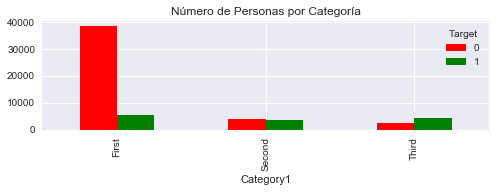

In [65]:
cat_1=train[['Category1','Target']].groupby(['Target','Category1']).size().unstack(0)
cat_1.plot(kind='bar',color=['red','green'], title='Número de Personas por Categoría', figsize=(8,2))

<b> Comentario: </b> Vemos que el el 1er.Tipo de Campamento es al que menos gente registrada asiste. Por lo tanto, "Category_1" podría ser un feature importante a la hora de predecir.

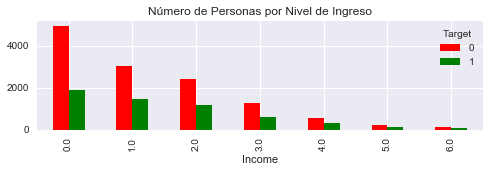

In [66]:
cat_2=train[['Income','Target']].groupby(['Target','Income']).size().unstack(0)
cat_2.plot(kind='bar',color=['red','green'], title='Número de Personas por Nivel de Ingreso', figsize=(8,2))

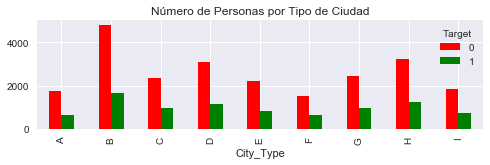

In [68]:
cat_3=train[['City_Type','Target']].groupby(['Target','City_Type']).size().unstack(0)
cat_3.plot(kind='bar',color=['red','green'], title='Número de Personas por Tipo de Ciudad', figsize=(8,2))

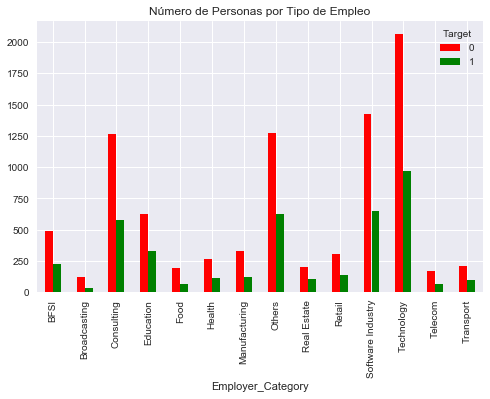

In [69]:
cat_4=train[['Employer_Category','Target']].groupby(['Target','Employer_Category']).size().unstack(0)
cat_4.plot(kind='bar',color=['red','green'], title='Número de Personas por Tipo de Empleo', figsize=(8,5))

## Completando Missings (NA) con -99

Comentario: Completar NA con -999 les ayuda a los Tree based models (i.e RF,XGboost,etc) a separar los missings en otra categoría.

In [70]:
train.fillna(-99,inplace=True)
test.fillna(-99,inplace=True)

In [71]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58532 entries, 0 to 58531
Data columns (total 29 columns):
Patient_ID                   58532 non-null int64
Health_Camp_ID               58532 non-null int64
Registration_Date            58532 non-null int64
Var1                         58532 non-null int64
Var2                         58532 non-null int64
Var3                         58532 non-null int64
Var4                         58532 non-null int64
Var5                         58532 non-null int64
Target                       58532 non-null int64
Online_Follower              58532 non-null int64
LinkedIn_Shared              58532 non-null int64
Twitter_Shared               58532 non-null int64
Facebook_Shared              58532 non-null int64
Income                       58532 non-null float64
Education_Score              58532 non-null float64
Age                          58532 non-null float64
First_Interaction            58532 non-null int64
City_Type                    58532 

In [72]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16746 entries, 0 to 16745
Data columns (total 24 columns):
Patient_ID            16746 non-null int64
Health_Camp_ID        16746 non-null int64
Registration_Date     16746 non-null int64
Var1                  16746 non-null int64
Var2                  16746 non-null int64
Var3                  16746 non-null int64
Var4                  16746 non-null int64
Var5                  16746 non-null int64
Online_Follower       16746 non-null int64
LinkedIn_Shared       16746 non-null int64
Twitter_Shared        16746 non-null int64
Facebook_Shared       16746 non-null int64
Income                16746 non-null float64
Education_Score       16746 non-null float64
Age                   16746 non-null float64
First_Interaction     16746 non-null int64
City_Type             16746 non-null object
Employer_Category     16746 non-null object
Camp_Start_Date       16746 non-null int64
Camp_End_Date         16746 non-null int64
Category1             1

## Creando Nuevos Features

<b> 1. Diferencia entre la Fecha de Inicio del Campamento  y la Fecha en la que se Registró </b>

In [73]:
train["Diff_CampStart_Registration"] = train["Camp_Start_Date"] - train["Registration_Date"]
test["Diff_CampStart_Registration"] = test["Camp_Start_Date"] - test["Registration_Date"]

<b> 2. Diferencia entre la Fecha en la que termina el Campamento  y la Fecha en la que se Registró </b>

In [74]:
train["Diff_CampEnd_Registration"] = train["Camp_End_Date"] - train["Registration_Date"]
test["Diff_CampEnd_Registration"] = test["Camp_End_Date"] - test["Registration_Date"]

<b> 3. Diferencia entre la Fecha de Registro y la Fecha de la First Interaction </b>

In [75]:
train["Diff_Registration_FirstInteraction"] = train["Registration_Date"] - train["First_Interaction"]
test["Diff_Registration_FirstInteraction"] = test["Registration_Date"] - test["First_Interaction"]

<b> 4. Diferencia entre la Fecha de Inicio del Campamento y la Fecha de la First Interaction </b>

In [76]:
train["Diff_CampStart_FirstInteraction"] = train["Camp_Start_Date"] - train["First_Interaction"]
test["Diff_CampStart_FirstInteraction"] = test["Camp_Start_Date"] - test["First_Interaction"]

In [77]:
print(train.shape)
print(test.shape)

(58532, 33)
(16746, 28)


<b> Variables Categóricas </b>

In [78]:
for col in train.columns:
    if train[col].dtype == 'object':
        print(col)

City_Type
Employer_Category
Category1
Category2
